#  Keras

In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
m=2
b=3
x = np.linspace(0,50,100)

np.random.seed(101)
noise=np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [3]:
y = 2*x + b + noise

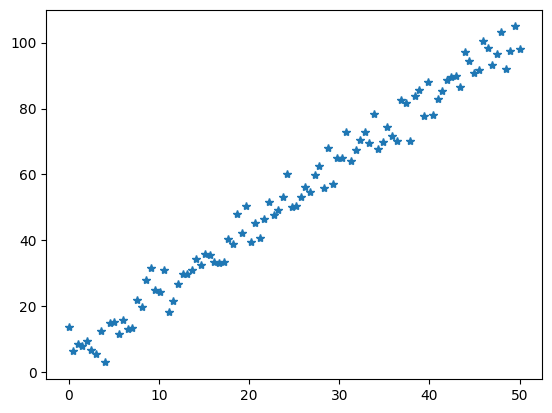

In [4]:
plt.plot(x,y,"*")

## Basic NN fit

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [6]:
model=Sequential()
# 4 neurons expection only 1 feasture with input_dim=1
model.add(Dense(4,input_dim=1,activation="relu"))
# 4 Neurons (use this number)
model.add(Dense(4,activation="relu"))
# one final output of u, so only 1 neuron
model.add(Dense(1,activation="linear"))
#Compil the layers
model.compile(loss="mse",optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


#### Train 

In [7]:
model.fit(x,y,epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 4ms/step - loss: 6696.5083
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 6644.1548
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 6592.5156
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 6544.9404
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 6495.6201
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 6449.2593
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 6404.1025
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 6357.9688
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 6314.5786
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 6267.7725
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 6224.9287
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 6183.7236
Epoch 13/500
4/4 [=======

#### Prediction

In [8]:
x_for_preds=np.linspace(0,50,1000)

In [9]:
y_preds=model.predict(x_for_preds)

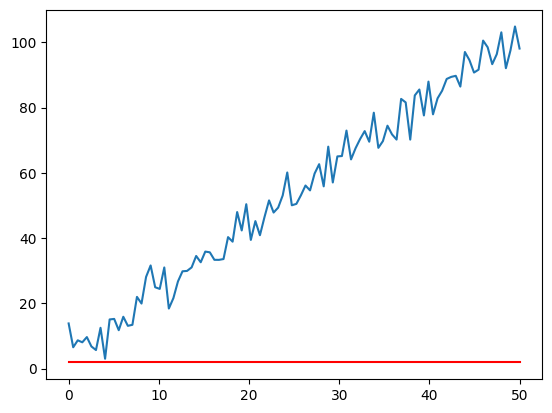

In [10]:
plt.plot(x,y)
plt.plot(x_for_preds,y_preds,"r")

#### Error evaluation

In [11]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [12]:
# real prediction for given x
prediction_true_y=model.predict(x)

In [13]:
mean_squared_error(y,prediction_true_y)

3519.978076916556

In [14]:
mean_absolute_error(y,prediction_true_y)

51.80623875135248

## RNN

In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv("./UDEMY_TSA_FINAL/Data/Alcohol_Sales.csv", index_col="DATE", parse_dates=True)
df.index.freq="MS"

In [17]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [18]:
df.columns=["Sales"]

<AxesSubplot:xlabel='DATE'>

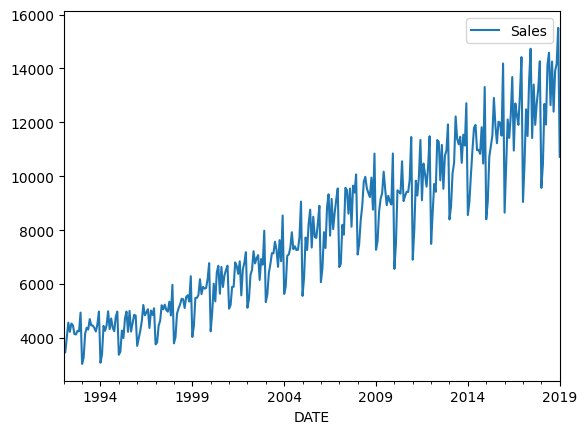

In [19]:
df.plot()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

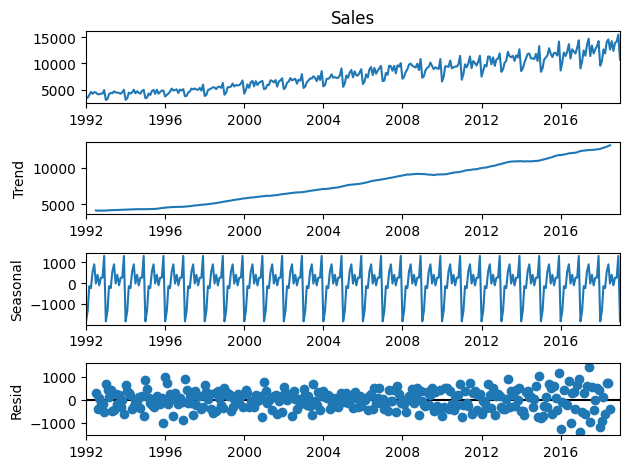

In [21]:
results=seasonal_decompose(df["Sales"])
results.plot();

<AxesSubplot:xlabel='DATE'>

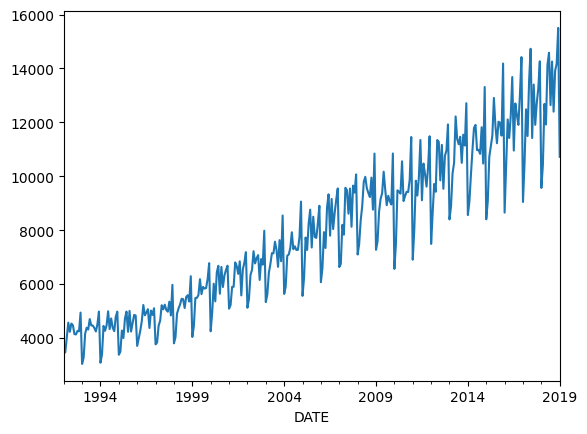

In [22]:
results.observed.plot()

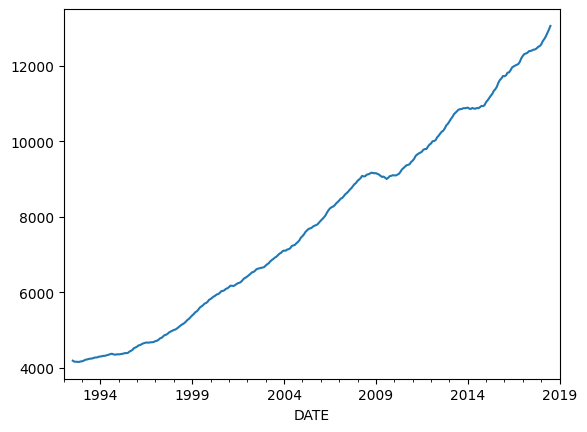

In [23]:
results.trend.plot();

<AxesSubplot:xlabel='DATE'>

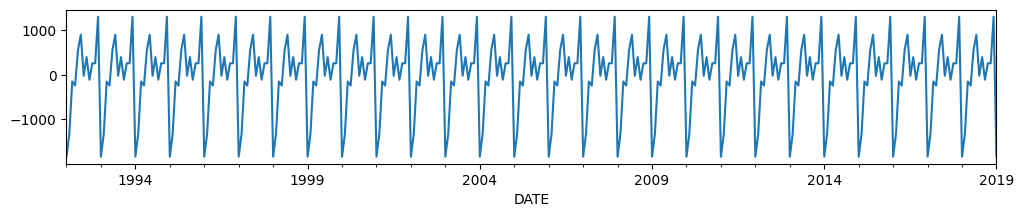

In [24]:
results.seasonal.plot(figsize=(12,2))

<AxesSubplot:xlabel='DATE'>

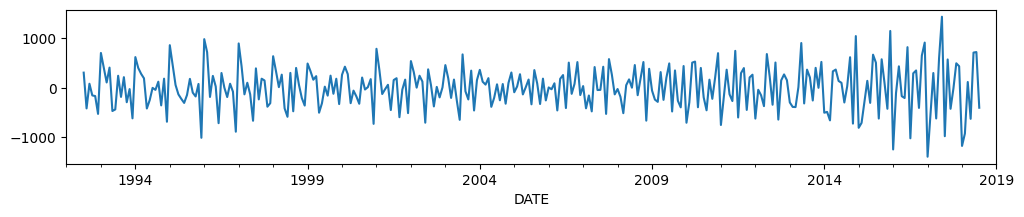

In [25]:
results.resid.plot(figsize=(12,2))

#### Train Test Splitting

In [26]:
len(df)

325

In [27]:
325-12 #12 months data for test

313

In [28]:
train=df.iloc[:313]
test=df.iloc[313:]

In [29]:
len(test) #12 months data for test

12

#### Scale the Data

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler=MinMaxScaler()

In [32]:
scaler.fit(train)

MinMaxScaler()

In [33]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [34]:
import matplotlib.pyplot as plt

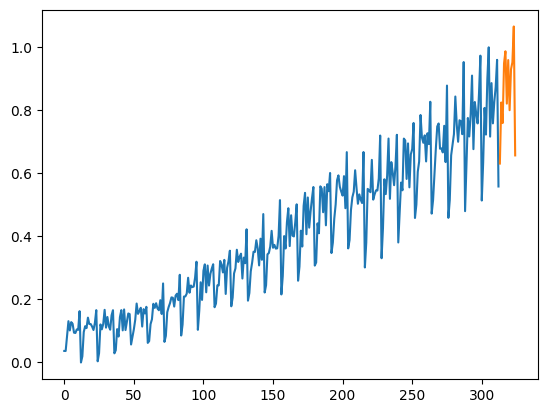

In [35]:
plt.plot(scaled_train)
plt.plot(np.arange(313,325),scaled_test);

#### this plot show how MinMax Scaler works as the max point becomes 1 in the y axis and the lowest point is 0

#### Time Series Generator

In [36]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [37]:
### defining generator
n_input=2
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train, length=n_input, batch_size=1)

In [38]:
len(scaled_train)

313

In [39]:
len(generator) # n_inpu=2

311

In [40]:
# first batch
X,y=generator[0]

In [41]:
print(f"given the array: \n{X.flatten()}")
print(f"predicted this y \n{y}")

given the array: 
[0.03658432 0.03649885]
predicted this y 
[[0.08299855]]


#### redefining n_input 12 months to predict the next month

In [42]:
n_input=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [43]:
X,y=generator[0]

In [44]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


### The Model

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [46]:
# define model
model=Sequential()
model.add(LSTM(100, activation="relu", input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [48]:
#fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50


C:\Users\Selim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


301/301 [==============================] - 4s 6ms/step - loss: 0.0174
Epoch 2/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0095
Epoch 3/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0087
Epoch 4/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0081
Epoch 5/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0082
Epoch 6/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0065
Epoch 7/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0053
Epoch 8/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0049
Epoch 9/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0030
Epoch 10/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0030
Epoch 11/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0023
Epoch 12/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0026
Epoch 13/50
301/301 [===============

In [49]:
model.history.history.keys()

dict_keys(['loss'])

In [50]:
model.history.history.items()

dict_items([('loss', [0.017432592809200287, 0.009491683915257454, 0.008690654300153255, 0.008124839514493942, 0.008180362172424793, 0.0065167308785021305, 0.005299002397805452, 0.004905934911221266, 0.003003650577738881, 0.00298240315169096, 0.00231681065633893, 0.002553001744672656, 0.0018522352911531925, 0.0017053409246727824, 0.0017048261361196637, 0.0019232375780120492, 0.0016803228063508868, 0.001766991801559925, 0.0020053077023476362, 0.001673219259828329, 0.002069075359031558, 0.0017423180397599936, 0.0018552191322669387, 0.00191367301158607, 0.0015691218432039022, 0.0015164074720814824, 0.0016947380499914289, 0.001443981658667326, 0.0016421441687271, 0.0015615278389304876, 0.0016187371220439672, 0.0012964130146428943, 0.0014624817995354533, 0.0014576239045709372, 0.0015385367441922426, 0.0015467785997316241, 0.0012847600737586617, 0.0014106502057984471, 0.0013534498866647482, 0.0014411155134439468, 0.0013102276716381311, 0.0013971640728414059, 0.0014785242965444922, 0.001456943

In [51]:
model.history.history["loss"]

[0.017432592809200287,
 0.009491683915257454,
 0.008690654300153255,
 0.008124839514493942,
 0.008180362172424793,
 0.0065167308785021305,
 0.005299002397805452,
 0.004905934911221266,
 0.003003650577738881,
 0.00298240315169096,
 0.00231681065633893,
 0.002553001744672656,
 0.0018522352911531925,
 0.0017053409246727824,
 0.0017048261361196637,
 0.0019232375780120492,
 0.0016803228063508868,
 0.001766991801559925,
 0.0020053077023476362,
 0.001673219259828329,
 0.002069075359031558,
 0.0017423180397599936,
 0.0018552191322669387,
 0.00191367301158607,
 0.0015691218432039022,
 0.0015164074720814824,
 0.0016947380499914289,
 0.001443981658667326,
 0.0016421441687271,
 0.0015615278389304876,
 0.0016187371220439672,
 0.0012964130146428943,
 0.0014624817995354533,
 0.0014576239045709372,
 0.0015385367441922426,
 0.0015467785997316241,
 0.0012847600737586617,
 0.0014106502057984471,
 0.0013534498866647482,
 0.0014411155134439468,
 0.0013102276716381311,
 0.0013971640728414059,
 0.00147852429

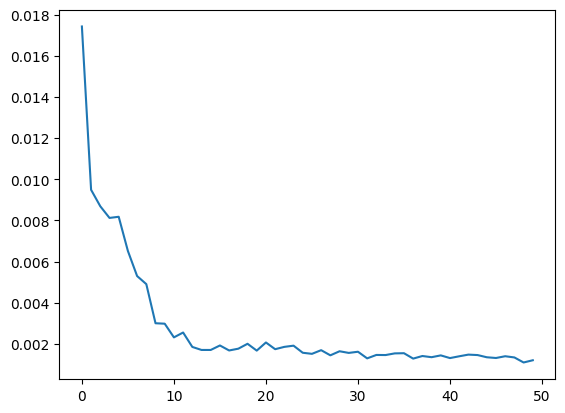

In [52]:
plt.plot(model.history.history["loss"])

### Evaluate Test Data

In [53]:
first_eval_batch=scaled_train[-12:]
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [54]:
#getting the correct shape 
first_eval_batch=first_eval_batch.reshape((1,n_input,n_features))

In [55]:
#getting prediction for the first eval batch
model.predict(first_eval_batch)

array([[0.72038984]], dtype=float32)

In [56]:
scaled_test[0] # comparint thhe predicted data with the test data

array([0.63116506])

### getting all predictions

In [57]:
test_predictions=[]

first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))

In [58]:
current_batch.shape

(1, 12, 1)

In [59]:
current_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [60]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80776135],
        [ 0.72313873],
        [ 0.89870929],
        [ 1.        ],
        [ 0.71672793],
        [ 0.88648602],
        [ 0.75869732],
        [ 0.82742115],
        [ 0.87443371],
        [ 0.96025301],
        [ 0.5584238 ],
        [99.        ]]])

In [61]:
### the top data is shifted one and 99. is added

#### get all predictions

In [62]:
test_predictions=[]

first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):

    #get pred 1time step ahead [0]
    current_pred=model.predict(current_batch)[0]


    # store pred
    test_predictions.append(current_pred)

    # update the batch now include preds and drop first val
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [63]:
test_predictions

[array([0.72038984], dtype=float32),
 array([0.81064475], dtype=float32),
 array([0.78583205], dtype=float32),
 array([0.9538439], dtype=float32),
 array([1.0012252], dtype=float32),
 array([0.7779384], dtype=float32),
 array([0.9185388], dtype=float32),
 array([0.7920589], dtype=float32),
 array([0.8776752], dtype=float32),
 array([0.91500676], dtype=float32),
 array([0.97322327], dtype=float32),
 array([0.6058477], dtype=float32)]

In [64]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

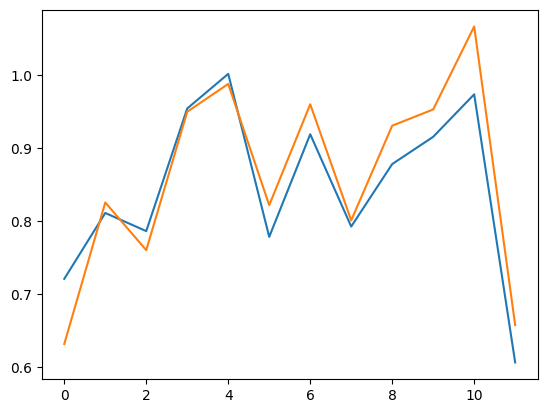

In [65]:
plt.plot(test_predictions)
plt.plot(scaled_test)

#### Inverse the MinMaxScale and Compare

In [66]:
true_preds=scaler.inverse_transform(test_predictions)

In [67]:
true_preds

array([[11458.84077311],
       [12514.73288143],
       [12224.44912326],
       [14190.01968807],
       [14744.33400178],
       [12132.1016404 ],
       [13776.98552442],
       [12297.29689676],
       [13298.92188013],
       [13735.6640476 ],
       [14416.73902386],
       [10118.81243336]])

In [68]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [69]:
test["Predictions"]=true_preds

C:\Users\Selim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11458.840773
2018-03-01,12683,12514.732881
2018-04-01,11919,12224.449123
2018-05-01,14138,14190.019688
2018-06-01,14583,14744.334002
2018-07-01,12640,12132.101640
2018-08-01,14257,13776.985524
2018-09-01,12396,12297.296897
2018-10-01,13914,13298.921880


<AxesSubplot:xlabel='DATE'>

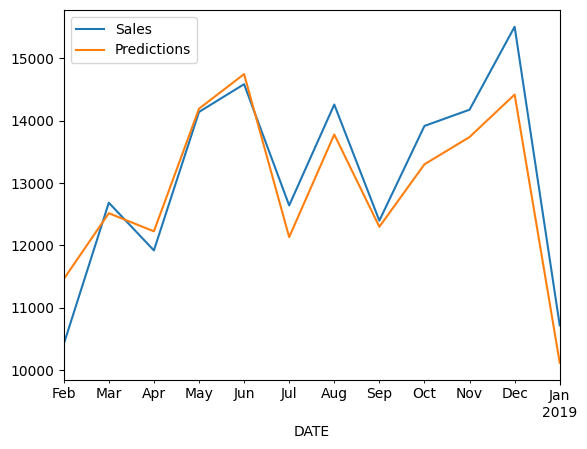

In [71]:
test.plot()

## Save and Load Models

In [72]:
model.save("myrnnmodel.h5")

In [73]:
from keras.models import load_model
new_model=load_model("myrnnmodel.h5")

In [74]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


## Exercise

In [75]:
df=pd.read_csv("./UDEMY_TSA_FINAL/Data/Miles_Traveled.csv",index_col=0,parse_dates=True)

In [76]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [77]:
df=df.rename(columns={"TRFVOLUSM227NFWA":"Value"})


In [79]:
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


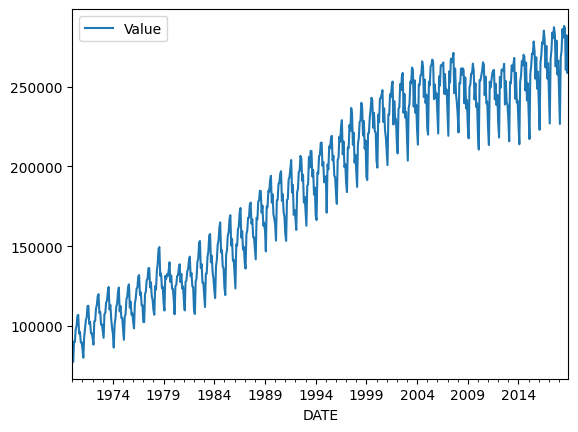

In [81]:
df.plot();

In [83]:
results=seasonal_decompose(df["Value"])

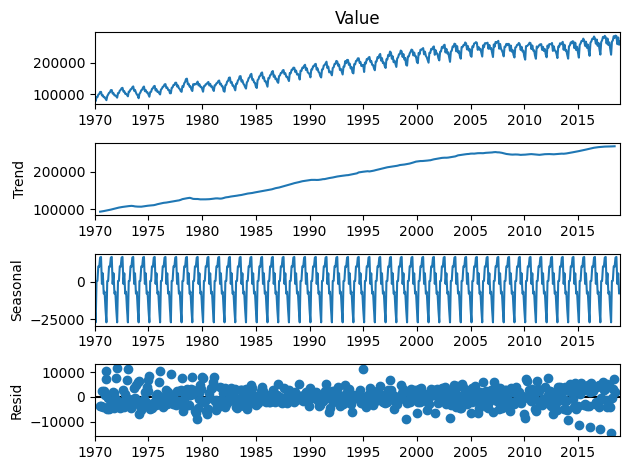

In [88]:
results.plot();

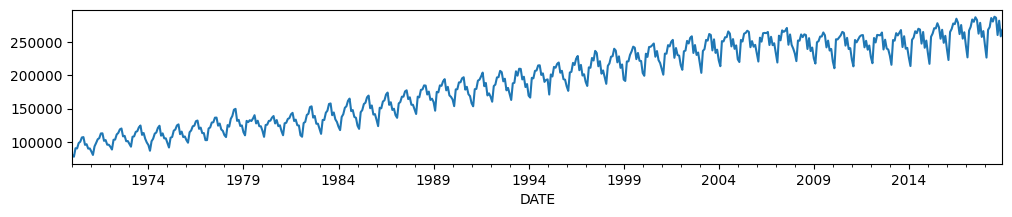

In [93]:
results.observed.plot(figsize=(12,2));

<AxesSubplot:xlabel='DATE'>

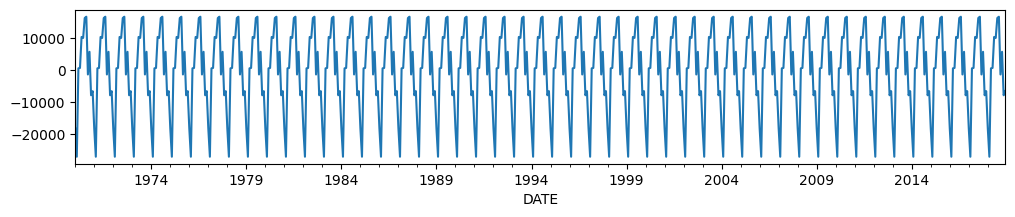

In [92]:
results.seasonal.plot(figsize=(12,2))

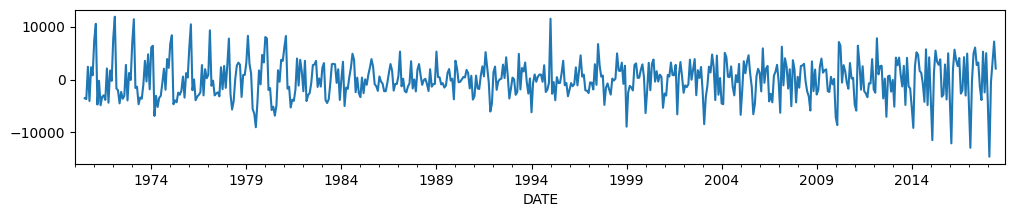

In [95]:
results.resid.plot(figsize=(12,2));

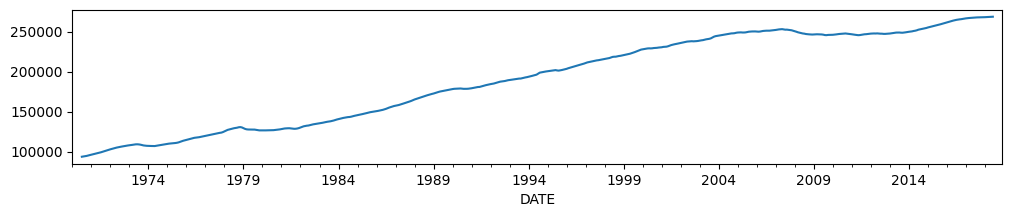

In [96]:
results.trend.plot(figsize=(12,2));

#### Train Test splitting

In [97]:
len(df)

588

In [99]:
df.head() #monthly data

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [104]:
train=df.iloc[:-12]
test=df.iloc[-12:]

In [105]:
len(test)

12

#### Scaling data

In [108]:
scaler=MinMaxScaler()

In [109]:
scaler.fit(train)

MinMaxScaler()

In [110]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [112]:
scaled_train.max()

1.0

In [113]:
scaled_test.max()

1.0038208488763751

#### Time Series Generator

In [114]:
n_input=12

In [115]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [116]:
X,y = generator[0]

In [117]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.0130109  0.         0.06089061 0.05961858 0.09780801 0.10763646
 0.13792216 0.14067108 0.08485905 0.08992334 0.05832273 0.0594042 ]
Predict this y: 
 [[0.03760821]]


#### Model

In [121]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [122]:
n_features

1

In [123]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 150)               91200     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.fit_generator(generator,epochs=50)

Epoch 1/50


C:\Users\Selim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


564/564 [==============================] - 8s 10ms/step - loss: 0.0134
Epoch 2/50
564/564 [==============================] - 6s 10ms/step - loss: 0.0054
Epoch 3/50
564/564 [==============================] - 5s 9ms/step - loss: 0.0034
Epoch 4/50
564/564 [==============================] - 7s 12ms/step - loss: 0.0024
Epoch 5/50
564/564 [==============================] - 5s 9ms/step - loss: 0.0021
Epoch 6/50
564/564 [==============================] - 5s 9ms/step - loss: 0.0019
Epoch 7/50
564/564 [==============================] - 5s 9ms/step - loss: 0.0016
Epoch 8/50
564/564 [==============================] - 5s 8ms/step - loss: 0.0014
Epoch 9/50
564/564 [==============================] - 5s 9ms/step - loss: 0.0012
Epoch 10/50
564/564 [==============================] - 5s 9ms/step - loss: 0.0010
Epoch 11/50
564/564 [==============================] - 5s 9ms/step - loss: 0.0011
Epoch 12/50
564/564 [==============================] - 5s 9ms/step - loss: 8.8294e-04
Epoch 13/50
564/564 [========

In [132]:
model.history.history.keys()

dict_keys(['loss'])

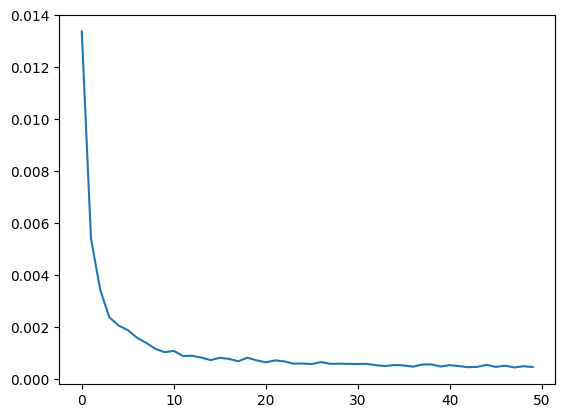

In [152]:
plt.plot(model.history.history["loss"]);

#### Evaluate the data

In [153]:
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [154]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [155]:
model.predict(first_eval_batch)

array([[0.80968577]], dtype=float32)

In [157]:
scaled_test[0]

array([0.80158265])

#### Generate predictions

In [158]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [159]:
current_batch.shape

(1, 12, 1)

In [160]:
current_batch

array([[[0.79630397],
        [0.71226435],
        [0.90477416],
        [0.93121043],
        [0.98386382],
        [0.96757519],
        [1.        ],
        [0.9801859 ],
        [0.8824684 ],
        [0.95995255],
        [0.85883345],
        [0.90086755]]])

In [161]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.71226435],
        [ 0.90477416],
        [ 0.93121043],
        [ 0.98386382],
        [ 0.96757519],
        [ 1.        ],
        [ 0.9801859 ],
        [ 0.8824684 ],
        [ 0.95995255],
        [ 0.85883345],
        [ 0.90086755],
        [99.        ]]])

In [162]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [164]:
test_predictions, scaled_test

([array([0.80968577], dtype=float32),
  array([0.7380448], dtype=float32),
  array([0.9075776], dtype=float32),
  array([0.93913084], dtype=float32),
  array([0.99636745], dtype=float32),
  array([0.9803229], dtype=float32),
  array([1.0140436], dtype=float32),
  array([0.9902706], dtype=float32),
  array([0.89822495], dtype=float32),
  array([0.9670037], dtype=float32),
  array([0.8710546], dtype=float32),
  array([0.9097692], dtype=float32)],
 array([[0.80158265],
        [0.71089704],
        [0.91013382],
        [0.92916661],
        [0.99438307],
        [0.969195  ],
        [1.00382085],
        [0.99649835],
        [0.8725685 ],
        [0.9753741 ],
        [0.86301637],
        [0.90981463]]))

#### Inverse transformation

In [165]:
true_predictions = scaler.inverse_transform(test_predictions)

In [168]:
true_predictions

array([[247395.85211545],
       [232358.34122354],
       [267943.4404133 ],
       [274566.50301057],
       [286580.52507305],
       [283212.75649434],
       [290290.75929523],
       [285300.7922802 ],
       [265980.31519568],
       [280417.04428804],
       [260277.22944278],
       [268403.46011317]])

In [169]:
test['Predictions'] = true_predictions
test

C:\Users\Selim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Value,Predictions
DATE,,
2018-01-01,245695.0,247395.852115
2018-02-01,226660.0,232358.341224
2018-03-01,268480.0,267943.440413
2018-04-01,272475.0,274566.503011
2018-05-01,286164.0,286580.525073
2018-06-01,280877.0,283212.756494
2018-07-01,288145.0,290290.759295
2018-08-01,286608.0,285300.792280
2018-09-01,260595.0,265980.315196


<AxesSubplot:xlabel='DATE'>

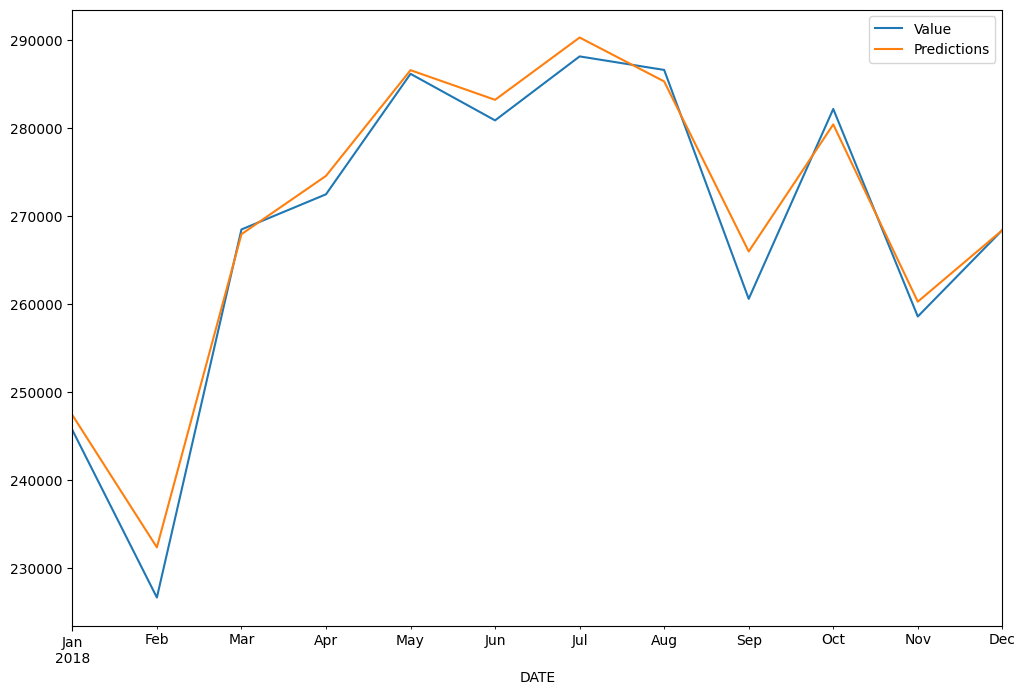

In [170]:
test.plot(figsize=(12,8))

#### Save Models

In [171]:
model.save('excercise.h5')

### Forecast

In [248]:
n_input=12

In [249]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [250]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)+12):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [251]:
test_predictions

[array([0.80968577], dtype=float32),
 array([0.7380448], dtype=float32),
 array([0.9075776], dtype=float32),
 array([0.93913084], dtype=float32),
 array([0.99636745], dtype=float32),
 array([0.9803229], dtype=float32),
 array([1.0140436], dtype=float32),
 array([0.9902706], dtype=float32),
 array([0.89822495], dtype=float32),
 array([0.9670037], dtype=float32),
 array([0.8710546], dtype=float32),
 array([0.9097692], dtype=float32),
 array([0.8223503], dtype=float32),
 array([0.7612428], dtype=float32),
 array([0.9111465], dtype=float32),
 array([0.9477486], dtype=float32),
 array([1.0086993], dtype=float32),
 array([0.99373925], dtype=float32),
 array([1.0288169], dtype=float32),
 array([1.0009643], dtype=float32),
 array([0.9133837], dtype=float32),
 array([0.974444], dtype=float32),
 array([0.88267565], dtype=float32),
 array([0.9185467], dtype=float32)]

In [252]:
true_predictions = scaler.inverse_transform(test_predictions)

In [253]:
true_predictions

array([[247395.85211545],
       [232358.34122354],
       [267943.4404133 ],
       [274566.50301057],
       [286580.52507305],
       [283212.75649434],
       [290290.75929523],
       [285300.7922802 ],
       [265980.31519568],
       [280417.04428804],
       [260277.22944278],
       [268403.46011317],
       [250054.15519005],
       [237227.62641352],
       [268692.56602371],
       [276375.37919015],
       [289168.99132955],
       [286028.86175215],
       [293391.70418715],
       [287545.40416396],
       [269162.1566956 ],
       [281978.76419002],
       [262716.50113535],
       [270245.86597252]])

In [254]:
test.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

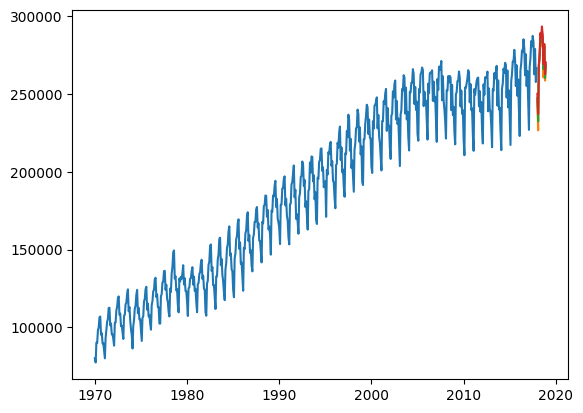

In [255]:
test.tail()

,Value,Predictions,Forecast
DATE,,,
2018-08-01,286608.0,285300.792280,287545.404164
2018-09-01,260595.0,265980.315196,269162.156696
2018-10-01,282174.0,280417.044288,281978.764190
2018-11-01,258590.0,260277.229443,262716.501135
2018-12-01,268413.0,268403.460113,270245.865973


In [226]:
test.reindex(pd.date_range("2019-01-01", "2019-12-01",freq="MS"), fill_value="NaN").tail(15)


,Value,Predictions,Forecast
2019-01-01,NaN,NaN,NaN
2019-02-01,NaN,NaN,NaN
2019-03-01,NaN,NaN,NaN
2019-04-01,NaN,NaN,NaN
2019-05-01,NaN,NaN,NaN
2019-06-01,NaN,NaN,NaN
2019-07-01,NaN,NaN,NaN
2019-08-01,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN


In [256]:
test1=test.append(test.reindex(pd.date_range("2019-01-01", "2019-12-01",freq="MS"), fill_value=0).tail(15)
)

<AxesSubplot:>

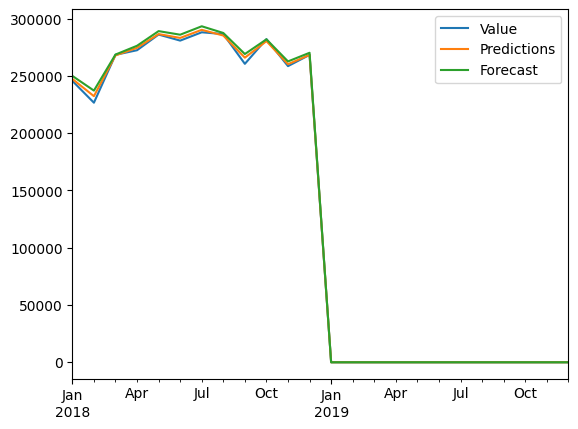

In [257]:
test1.plot()

In [264]:
test1["Forecast"].iloc[-24:]=true_predictions.reshape(24,)

In [263]:
true_predictions.shape

(24, 1)

In [262]:
test1["Forecast"].iloc[-24:].shape

(24,)

In [266]:
test1.tail()

,Value,Predictions,Forecast
2019-08-01,0.0,0.0,287545.404164
2019-09-01,0.0,0.0,269162.156696
2019-10-01,0.0,0.0,281978.764190
2019-11-01,0.0,0.0,262716.501135
2019-12-01,0.0,0.0,270245.865973


<AxesSubplot:>

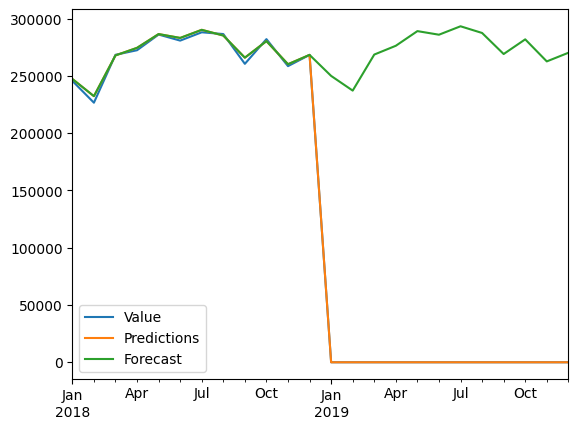

In [267]:
test1.plot()